# K Means Clustering 

|Credentials||
|---|---|
|Name|Ritvik Gupta|
|Registration Number|19BCE0397|
|Assignment|K Means Clustering|


In [120]:
# Importing necessary packages and tools required to perform
# K Means Clustering

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons, make_circles
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns


<br/>

### Pros and Cons for Statistical Datasets

||Pros|Cons|
|---|---|---|
|1|Relatively simple to implement|Choosing _k_ manually|
|2|Scales to large data sets|Being dependent on initial values|
|3|Guarantees convergence|Clustering data of varying sizes and density|
|4|Can warm-start the positions of centroids|Clustering outliers|
|5|Easily adapts to new examples|Scaling with number of dimensions|

In [130]:
random_state = 768
n_samples = 1500


fig = make_subplots(
    rows=4,
    cols=2,
    subplot_titles=(
        "",
        "Incorrect Num Clusters",
        "",
        "Anisotropicly distributed",
        "",
        "Different variance",
        "",
        "Unevenly sized blobs",
    ),
)


x1, y1 = make_blobs(n_samples=n_samples, random_state=random_state)
fig.add_trace(go.Scatter(x=x1[:, 0], y=x1[:, 1], mode="markers"), row=1, col=1)

y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(x1)
fig.add_trace(
    go.Scatter(
        x=x1[:, 0],
        y=x1[:, 1],
        mode="markers",
        marker=dict(color=y_pred, colorscale="Turbo"),
    ),
    row=1,
    col=2,
)

transformation = [[0.60, -0.65], [-0.40, 0.85]]
x2 = np.dot(x1, transformation)
fig.add_trace(go.Scatter(x=x2[:, 0], y=x2[:, 1], mode="markers"), row=2, col=1)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(x2)
fig.add_trace(
    go.Scatter(
        x=x2[:, 0],
        y=x2[:, 1],
        mode="markers",
        marker=dict(color=y_pred, colorscale="Turbo"),
    ),
    row=2,
    col=2,
)

x3, _ = make_blobs(
    n_samples=n_samples, random_state=random_state, cluster_std=[1.0, 2.5, 0.5]
)
fig.add_trace(go.Scatter(x=x3[:, 0], y=x3[:, 1], mode="markers"), row=3, col=1)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(x3)
fig.add_trace(
    go.Scatter(
        x=x3[:, 0],
        y=x3[:, 1],
        mode="markers",
        marker=dict(color=y_pred, colorscale="Turbo"),
    ),
    row=3,
    col=2,
)


x4 = np.vstack((x1[y1 == 0][:500], x1[y1 == 1][:100], x1[y1 == 2][:10]))
fig.add_trace(go.Scatter(x=x4[:, 0], y=x4[:, 1], mode="markers"), row=4, col=1)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(x4)
fig.add_trace(
    go.Scatter(
        x=x4[:, 0],
        y=x4[:, 1],
        mode="markers",
        marker=dict(color=y_pred, colorscale="Turbo"),
    ),
    row=4,
    col=2,
)


fig.update_layout(height=1600)

fig.show()


<br/>

##### K Means generalizes to clusters of different shapes and sizes, such as **elliptical clusters** but is not able to generalize for **non-hyper spherical or elliptical** datasets.


In [104]:
noise = 0.175

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=(
        "Perdicting Moons",
        "Fails to predict for Moons",
        "Perdicting Circles",
        "Correctly predicts for Circles",
    ),
)

x1, _ = make_moons(n_samples=n_samples, random_state=random_state, noise=noise)

fig.add_trace(go.Scatter(x=x1[:, 0], y=x1[:, 1], mode="markers"), row=1, col=1)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(x1)
fig.add_trace(
    go.Scatter(
        x=x1[:, 0],
        y=x1[:, 1],
        mode="markers",
        marker=dict(color=y_pred),
    ),
    row=1,
    col=2,
)

x2, _ = make_circles(n_samples=n_samples, random_state=random_state, noise=noise)

fig.add_trace(go.Scatter(x=x2[:, 0], y=x2[:, 1], mode="markers"), row=2, col=1)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(x2)
fig.add_trace(
    go.Scatter(
        x=x2[:, 0],
        y=x2[:, 1],
        mode="markers",
        marker=dict(color=y_pred),
    ),
    row=2,
    col=2,
)

fig.update_layout(height=800)

fig.show()


<br/>

### Performing K Means Clustering for Customer Dataset


In [70]:
df = pd.read_csv("./dataset/segmented_customers.csv")

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


<br/>

### Looking at the Variance Distribution and selecting the relevant attributes for K Means

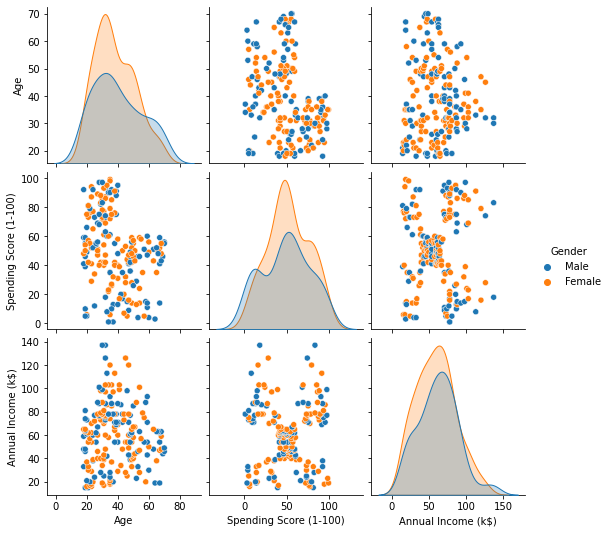

In [122]:
sns.pairplot(
    df, vars=["Age", "Spending Score (1-100)", "Annual Income (k$)"], hue="Gender"
)


In [85]:
px.scatter(
    df,
    x="Age",
    y="Spending Score (1-100)",
    size="Annual Income (k$)",
    color="Annual Income (k$)",
    title="Age v/s Spending Score Visualized based on Annual Income",
    labels={"Age": "Individual's Age", "Spending Score (1-100)": "Spending Score"},
).show()


In [87]:
df[["Age", "Spending Score (1-100)"]]


,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [86]:
x1 = df[["Age", "Spending Score (1-100)"]].to_numpy()


In [105]:
inertia = []
for n in range(1, 15):
    algorithm = KMeans(
        n_clusters=n,
        init="k-means++",
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm="elkan",
    )
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

inertia


C:\Users\Ritvik Gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



[1576.880831380647,
 660.0558069407709,
 453.1782329839284,
 308.9576815789536,
 244.64931625149947,
 183.07548512550756,
 152.61619672583367,
 126.04158250853536,
 111.47477901465516,
 98.00862666985876,
 89.18444254108842,
 81.82379130775185,
 76.41763232890425,
 71.30232892831765]

In [118]:
fig = px.line(
    x=np.arange(1, 15),
    y=inertia,
    markers=True,
    text=list(map(int, inertia)),
    labels={"X": "Number of Clusters", "Y": "Interia Generated"},
)

fig.update_traces(textposition="top right")

fig.show()


In [99]:
algorithm = KMeans(
    n_clusters=5,
    init="k-means++",
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm="elkan",
)
algorithm.fit(x1)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_


In [100]:
h = 0.02
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1

y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = algorithm.predict(np.c_[x_grid.ravel(), y_grid.ravel()])


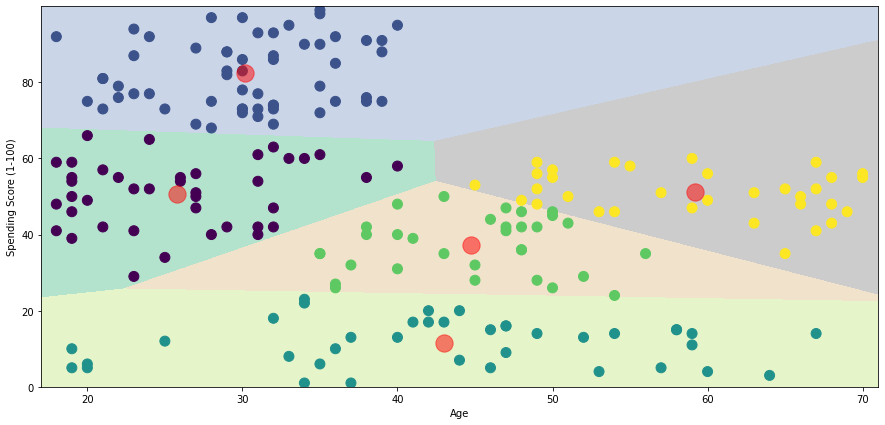

In [102]:
plt.figure(1, figsize=(15, 7))
plt.clf()
z = z.reshape(x_grid.shape)
plt.imshow(
    z,
    interpolation="nearest",
    extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),
    cmap=plt.cm.Pastel2,
    aspect="auto",
    origin="lower",
)

plt.scatter(x="Age", y="Spending Score (1-100)", data=df, c=labels, s=100)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=300, c="red", alpha=0.5)
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Age")
plt.show()


In [93]:
x2 = df[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values


In [94]:
algorithm = KMeans(
    n_clusters=5,
    init="k-means++",
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm="elkan",
)
algorithm.fit(x2)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_


In [95]:
h = 0.5
x_min, x_max = x2[:, 0].min() - 1, x2[:, 0].max() + 1
y_min, y_max = x2[:, 1].min() - 1, x2[:, 1].max() + 1
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = algorithm.predict(np.c_[x_grid.ravel(), y_grid.ravel()])


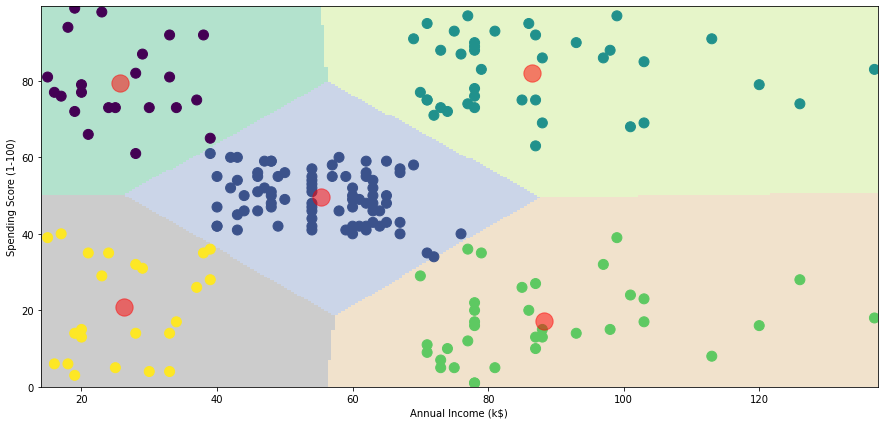

In [96]:
plt.figure(1, figsize=(15, 7))
plt.clf()
z = z.reshape(x_grid.shape)
plt.imshow(
    z,
    interpolation="nearest",
    extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()),
    cmap=plt.cm.Pastel2,
    aspect="auto",
    origin="lower",
)

plt.scatter(
    x="Annual Income (k$)", y="Spending Score (1-100)", data=df, c=labels, s=100
)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=300, c="red", alpha=0.5)
plt.ylabel("Spending Score (1-100)"), plt.xlabel("Annual Income (k$)")
plt.show()
